# Measure the distance to cells in another label image
In some projects imaging cells, nuclei and other organelles with multiple markers, we are interested in measuring distances between cells with different expression patterns. Given a tissue where not all cells express a certain marker, we may want to measure the distance of each cell to the next cell expressing that marker. Hence, we want to measure and visualize that distance in a map.

In [1]:
import numpy as np
import pyclesperanto_prototype as cle
import pandas as pd

cle.get_device()

<gfx90c on Platform: AMD Accelerated Parallel Processing (2 refs)>

Our starting point is a label image and another label image, where some of the labels in the first image are selected from. The first label image represents all cells. The second label image represents cells that express the marker.

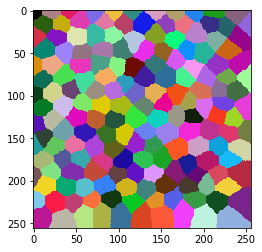

In [2]:
label_image = cle.artificial_tissue_2d()
cle.imshow(label_image, labels=True)

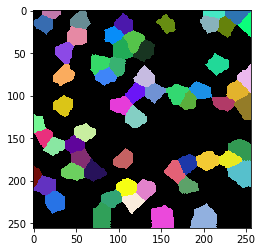

In [3]:
random_vector = np.random.random((1, int(label_image.max() + 1)))
sparse_labels = cle.exclude_labels_with_values_out_of_range(random_vector, label_image, minimum_value_range=0, maximum_value_range=0.3)
cle.imshow(sparse_labels, labels=True)

We now count for every label in `label_image`, how many labels are proximal to it in the `sparse_labels` image. For measuring the distance, we use the centroid distance.

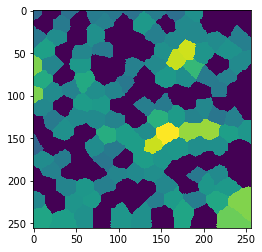

In [4]:
distance_map = cle.average_distance_to_n_nearest_other_labels_map(label_image, sparse_labels, n=1)
cle.imshow(distance_map)

We can also read out these values.

In [5]:
statistics = cle.statistics_of_labelled_pixels(distance_map, label_image)

table = pd.DataFrame(statistics)

# The table above contains too much information.
# Hence, we rename a column and remove most others
table = table.rename(columns={"mean_intensity": "centroid_distance"})
table[['label', 'centroid_distance']]

,label,centroid_distance
0,1,13.957838
1,2,0.000000
2,3,15.516336
3,4,17.409723
4,5,16.673353
...,...,...
170,171,20.870539
171,172,0.000000
172,173,24.419371
173,174,0.000000
